In [1]:
from classes_and_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def harvest_function(time, dt):

    tau = 1

    d_energy = np.exp(-time/tau)*(1 - np.exp(-dt/tau))

    return d_energy

def exploitation_effort_function(time, dt):

    return 0

def travel_effort_function(time):

    return 0


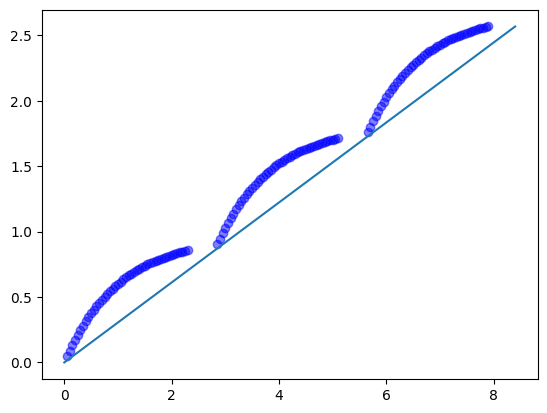

In [10]:
t_travel = 0.5

agent_a = agent(t_travel, travel_effort_function)

patch_0 = patch(harvest_function, exploitation_effort_function)
patch_1 = patch(harvest_function, exploitation_effort_function)
patch_2 = patch(harvest_function, exploitation_effort_function)

patches = [patch_0,patch_1,patch_2]

i = 0

while i<3:

    agent_a.exploit_patch(patches[i])

    # plt.scatter(patches[i].residence_time, patches[i].total_harvested_energy, c='red', alpha=0.5)
    plt.scatter(agent_a.time, agent_a.energy, c='blue', alpha=0.5)

    if agent_a.intake_rate<0.1:

        i += 1
        agent_a.travel()

average_intake_rate = agent_a.energy/agent_a.time

time_array = np.linspace(0,agent_a.time)
plt.plot(time_array, time_array*average_intake_rate)


In [12]:
agent_a.exploit_patch(patch_0)

In [36]:
def is_rewarded(n_reward, n_turns_since_last_reward) : #Function that sets up the kind of protocole you are using
    
    DELAY = 2
    PLATEAU = 100
    DEPLETING_SLOPE = 0.2

    # n_turns: number of turn in patch
    # n_turns_since_last_reward: number of turn in patch since last reward
    # n_turns_ne: 

    t = DEPLETING_SLOPE * (n_reward - DELAY) # [DEPLETING_SLOPE] more turns than the previous one are requiered to get the reward
    
    if n_reward < DELAY :
        
        t = 0
    
    elif t > PLATEAU :

        t = PLATEAU
            
        
    
    result = 1 if n_turns_since_last_reward >= t else 0
    
    return result

def reward_function(n_turns):

    n_tot_reward = 0
    n_turns_since_last_reward = 0

    for _ in range(n_turns):

        reward = is_rewarded(n_tot_reward, n_turns_since_last_reward)

        if reward:

            n_turns_since_last_reward = 0
        
        else:

            n_turns_since_last_reward += 1
        
        n_tot_reward += reward


    return n_tot_reward



def theoretical_reward_function(n_turns) : #Function that sets up the kind of protocole you are using
    
    DELAY = 2
    PLATEAU = 100
    DEPLETING_SLOPE = 0.2
    C = 0

    if n_turns<=DELAY:

        n_tot_reward = 1

    else:

        n_tot_reward = np.sqrt(2) * np.sqrt(DEPLETING_SLOPE*n_turns + C)
    
    return n_tot_reward


20

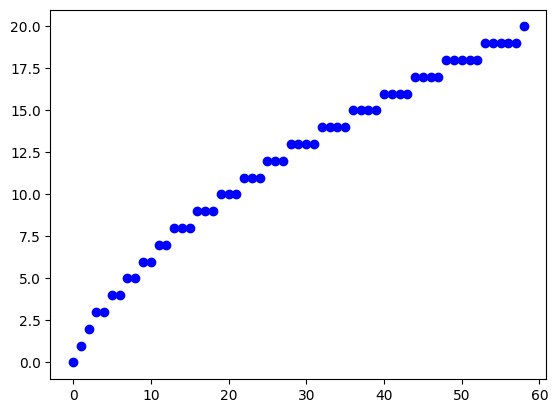

In [137]:
def is_rewarded(n_reward, n_turns_since_last_reward) : #Function that sets up the kind of protocole you are using
    
    DELAY = 2
    PLATEAU = 100
    DEPLETING_SLOPE = 0.2

    # n_turns: number of turn in patch
    # n_turns_since_last_reward: number of turn in patch since last reward
    # n_turns_ne: 

    t = DEPLETING_SLOPE * (n_reward - DELAY) # [DEPLETING_SLOPE] more turns than the previous one are requiered to get the reward
    
    if n_reward < DELAY :
        
        t = 0
    
    elif t > PLATEAU :

        t = PLATEAU
            
        
    
    result = 1 if n_turns_since_last_reward >= t else 0
    
    return result

def reward_function(n_turns):

    n_tot_reward = 0
    n_turns_since_last_reward = 0

    for _ in range(n_turns):

        reward = is_rewarded(n_tot_reward, n_turns_since_last_reward)

        if reward:

            n_turns_since_last_reward = 0
        
        else:

            n_turns_since_last_reward += 1
        
        n_tot_reward += reward


    return n_tot_reward



# def theoretical_reward_function(n_turns) : #Function that sets up the kind of protocole you are using
    
#     DELAY = 2
#     PLATEAU = 100
#     DEPLETING_SLOPE = 0.2*2
#     C = 4

#     if n_turns<=DELAY:

#         n_tot_reward = 1

#     else:

#         n_tot_reward = np.sqrt(2) * np.sqrt(DEPLETING_SLOPE*n_turns + C)
    
#     return n_tot_reward

def theoretical_reward_function(n_turns) : #Function that sets up the kind of protocole you are using
    
    return

    x = n_turns
    
    n_tot_reward = 0

    
    return n_tot_reward



n_turns = np.arange(0,59)

y0_list = []

for n in n_turns:

    y0 = reward_function(n)
    y0_list.append(y0)
    # y1 = theoretical_reward_function(n)

    plt.scatter(n,y0, c='blue')
    # plt.scatter(n,y1, c='red')

# plt.yscale('log')

a = 1.1
b = 2
c = 0

# y1 = 0

y1 = np.log(n_turns+1)*3

# plt.plot(n_turns, y1)
y0

In [89]:
print(y0_list)

[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25]
